In [1]:
#importing libraries
import lyricsgenius as lg
import pandas as pd
import numpy as np
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
genius = lg.Genius('xxxxxxxxxxxxxxxxxxxxxxxxxx', 
                   skip_non_songs=True, excluded_terms=['(Remix)', '(Live)'])

In [3]:
#creating  empty lists to store values
artist = []
title = []
album = []
year = []
lyrics = []


wizkid = genius.search_artist('Wizkid', per_page=50, sort='popularity', include_features=False)
    
for song in wizkid.songs:
    artist.append(song.artist)
    title.append(song.title)
    album.append(song.album)
    year.append(song.year)
    lyrics.append(song.lyrics)

Searching for songs by Wizkid...

Song 1: "Come Closer"
"Ojuelegba (Remix)" is not valid. Skipping.
Song 2: "Ojuelegba"
Song 3: "Blessed"
Song 4: "Joro"
Song 5: "Essence"
Song 6: "Ginger"
Song 7: "Reckless"
Song 8: "Fever"
Song 9: "No Stress"
Song 10: "Smile"
Song 11: "Ghetto Love"
Song 12: "True Love"
Song 13: "Longtime"
Song 14: "Jaiye Jaiye"
Song 15: "African Bad Gyal"
Song 16: "Daddy Yo"
Song 17: "Piece of Me"
Song 18: "Everytime"
Song 19: "Sweet One"
"OVO Sound Radio Episode 37 Tracklist" is not valid. Skipping.
Song 20: "Don’t Dull"
Song 21: "Final (Baba Nla)"
Song 22: "Grace"
Song 23: "Sweet Love"
Song 24: "Naughty Ride"
Song 25: "Mighty Wine"
Song 26: "Medicine"
Song 27: "Love My Baby"
Song 28: "Lagos Vibes"
Song 29: "Gyrate"
Song 30: "Oluwa Lo Ni"
Song 31: "Picture Perfect"
"Shabba (Remix)" is not valid. Skipping.
"Drogba (Joanna) (Wizkid Remix)" is not valid. Skipping.
Song 32: "No Lele"
Song 33: "One for Me"
Song 34: "Roma"
Song 35: "Pick Up The Phone (Refix)"
Song 36: "Odoo

In [4]:
#creating dataframe from lists
df_wizkid = pd.DataFrame({'artist':artist, 'title':title, 'album':album, 'year':year, 'lyrics':lyrics})
df_wizkid.head()

,artist,title,album,year,lyrics
0,Wizkid,Come Closer,Sounds from the Other Side,2017-03-31,"[Intro: Drake & Wizkid]\nGo outside, big time ..."
1,Wizkid,Ojuelegba,Ayọ (Joy),2014-09-17,"[Intro]\n(It's Legendury Beatz)\nYea, yea, yea..."
2,Wizkid,Blessed,Made in Lagos,2020-10-29,"[Intro]\nCold mineral, cold pure water\n\n[Wiz..."
3,Wizkid,Joro,None,2019-09-30,"[Intro/Chorus]\nJoro, joro, joro, joro, joro, ..."
4,Wizkid,Essence,Made in Lagos,2020-10-29,[Intro: Wizkid]\nOhh naa naa\nOmo je ka shi ge...


In [5]:
#function to clean lyrics column
def clean(df,column):
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1 |2 |3] |chorus |bridge |outro","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n", " ").str.replace(r"[^\w\d'\s]+", "").str.replace(r"'+", "")
    df[column] = df[column].str.strip()
    
    return df

In [6]:
df_wizkid = clean(df_wizkid, 'lyrics')

In [7]:
#creating list with index to replace with correct album title
indices = [29, 45, 64, 71]
df_wizkid.loc[indices, 'album'] = 'Superstar'

In [8]:
df_wizkid.dropna(how='any', axis=0, subset=['album'], inplace=True)#dropping rows with null values
df_wizkid.dropna(how='any', axis=0, subset=['lyrics'], inplace=True)
df_wizkid.head()

,artist,title,album,year,lyrics
0,Wizkid,Come Closer,Sounds from the Other Side,2017-03-31,drake wizkid go outside big time forward heh ...
1,Wizkid,Ojuelegba,Ayọ (Joy),2014-09-17,its legendury beatz yea yea yea yea wizzy baba...
2,Wizkid,Blessed,Made in Lagos,2020-10-29,cold mineral cold pure water wizkid woah woah...
4,Wizkid,Essence,Made in Lagos,2020-10-29,wizkid ohh naa naa omo je ka shi ge ge woah oh...
5,Wizkid,Ginger,Made in Lagos,2020-10-29,chorus burna boy wizkid if you want make i gi...


In [9]:
df_wizkid.reset_index(inplace=True)#reseting index
df_wizkid.drop(['index'], axis=1, inplace=True)#dropping former index column
df_wizkid.drop(df_wizkid.index[[-1, -3]], inplace=True)
df_wizkid.head()

,artist,title,album,year,lyrics
0,Wizkid,Come Closer,Sounds from the Other Side,2017-03-31,drake wizkid go outside big time forward heh ...
1,Wizkid,Ojuelegba,Ayọ (Joy),2014-09-17,its legendury beatz yea yea yea yea wizzy baba...
2,Wizkid,Blessed,Made in Lagos,2020-10-29,cold mineral cold pure water wizkid woah woah...
3,Wizkid,Essence,Made in Lagos,2020-10-29,wizkid ohh naa naa omo je ka shi ge ge woah oh...
4,Wizkid,Ginger,Made in Lagos,2020-10-29,chorus burna boy wizkid if you want make i gi...


In [10]:
sw_list = ['you', 'i', 'o', 'im'] #creating list with new stopwords
new_stopwords = list(stopwords.words('english'))
new_stopwords = new_stopwords + sw_list

In [11]:
wiz_lyrics = df_wizkid['lyrics']
wiz_lyrics = wiz_lyrics.apply(word_tokenize)#applying word_tokenize to list

In [12]:
#append lyrics without stopwords to new list
wfiltered_words = []
for i in wiz_lyrics:
    for j in i:
        if j not in new_stopwords:
            wfiltered_words.append(j)

In [13]:
wiz_top_words = Counter(wfiltered_words)#count words

In [14]:
#create dataframe from counter dictionary
Wiz_Top_words = pd.DataFrame.from_dict(wiz_top_words, orient='index').reset_index()
Wiz_Top_words = Wiz_Top_words.rename(columns={'index':'Top words', 0:'Count'})
Wiz_Top_words.sort_values('Count', inplace = True)
Wiz_Top_words.reset_index(inplace=True)

In [15]:
Wiz_Top_words.drop(['index'], axis=1, inplace=True)
Wiz_Top_words.shape

(1913, 2)

In [16]:
Wiz_Top_words.drop(Wiz_Top_words.index[:1893], inplace=True)#dropping unneeded words

In [17]:
#function to plot top occuring words
def plot_words(df, artist_name, palette):
    fig, ax = plt.subplots(figsize=(16,8))
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x= 'Top words', y = 'Count', data = df, palette = palette)
    plt.xlabel('Words', size = 14)
    plt.ylabel('Word count', size = 14)
    plt.title("Most used words in {}s' Albums lyrics".format(artist_name), size = 16)
    plt.show

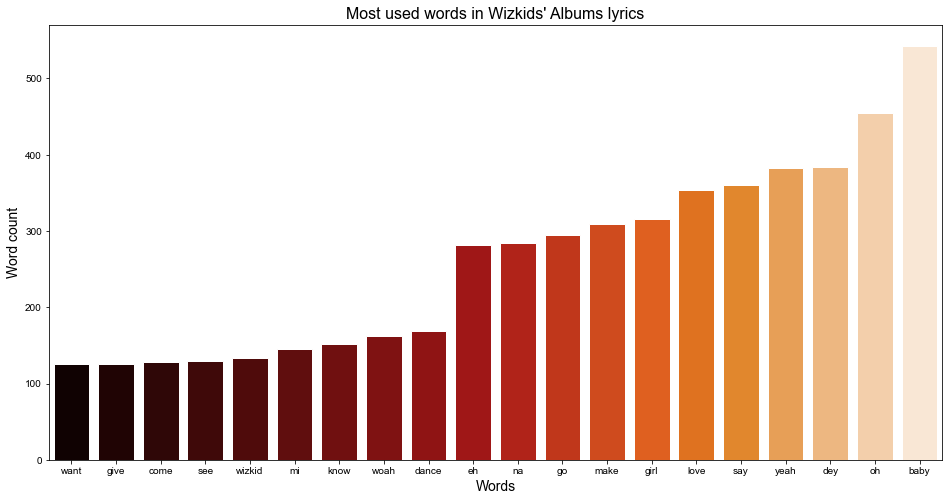

In [18]:
plot_words(Wiz_Top_words, 'Wizkid', 'gist_heat')#plot top words

In [19]:
#function to get subjectivity and polarity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [20]:
df_wizkid['subjectivity'] = df_wizkid['lyrics'].apply(getSubjectivity)
df_wizkid['polarity'] = df_wizkid['lyrics'].apply(getPolarity)

df_wizkid.head()

,artist,title,album,year,lyrics,subjectivity,polarity
0,Wizkid,Come Closer,Sounds from the Other Side,2017-03-31,drake wizkid go outside big time forward heh ...,0.483529,0.138039
1,Wizkid,Ojuelegba,Ayọ (Joy),2014-09-17,its legendury beatz yea yea yea yea wizzy baba...,0.505000,0.290000
2,Wizkid,Blessed,Made in Lagos,2020-10-29,cold mineral cold pure water wizkid woah woah...,0.485417,0.126575
3,Wizkid,Essence,Made in Lagos,2020-10-29,wizkid ohh naa naa omo je ka shi ge ge woah oh...,0.590179,0.142411
4,Wizkid,Ginger,Made in Lagos,2020-10-29,chorus burna boy wizkid if you want make i gi...,0.588972,0.249029


In [21]:
def get_text_analysis(t):
    if t < 0:
        return 'Negative'
    elif t == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [22]:
df_wizkid['sentiment'] = df_wizkid['polarity'].apply(get_text_analysis)
df_wizkid.head()

,artist,title,album,year,lyrics,subjectivity,polarity,sentiment
0,Wizkid,Come Closer,Sounds from the Other Side,2017-03-31,drake wizkid go outside big time forward heh ...,0.483529,0.138039,Positive
1,Wizkid,Ojuelegba,Ayọ (Joy),2014-09-17,its legendury beatz yea yea yea yea wizzy baba...,0.505000,0.290000,Positive
2,Wizkid,Blessed,Made in Lagos,2020-10-29,cold mineral cold pure water wizkid woah woah...,0.485417,0.126575,Positive
3,Wizkid,Essence,Made in Lagos,2020-10-29,wizkid ohh naa naa omo je ka shi ge ge woah oh...,0.590179,0.142411,Positive
4,Wizkid,Ginger,Made in Lagos,2020-10-29,chorus burna boy wizkid if you want make i gi...,0.588972,0.249029,Positive


In [23]:
df_wizkid.groupby('album')['sentiment'].value_counts()#get sentiment value counts

album                       sentiment
Ayọ (Joy)                   Positive     13
                            Negative      3
Made in Lagos               Positive     13
                            Negative      1
Sounds from the Other Side  Positive      8
                            Negative      4
Superstar                   Positive     11
                            Negative      4
Name: sentiment, dtype: int64

In [24]:
#create dataframe from artists albums and corresponding sentiment
wiz_sentiment_data = pd.DataFrame({'album': ['Ayọ (Joy)', 'Made in Lagos', 'Sounds from the Other Side', 'Superstar'],
                              'positive': [13, 13, 8, 11], 'negative': [3, 1, 4, 4]})
wiz_sentiment_data = wiz_sentiment_data.set_index('album')

In [25]:
#function to plot sentiment
def plot_sentiment(df, artist_name, color):
    df.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette(color)), figsize=(12,8))
    plt.xlabel('album', size=12)
    plt.ylabel('sentiment_count', size=12)
    plt.title("Sentiment Analysis of each {}s' Album".format(artist_name), size=16)
    plt.grid(b=None)
    plt.legend()
    plt.show()

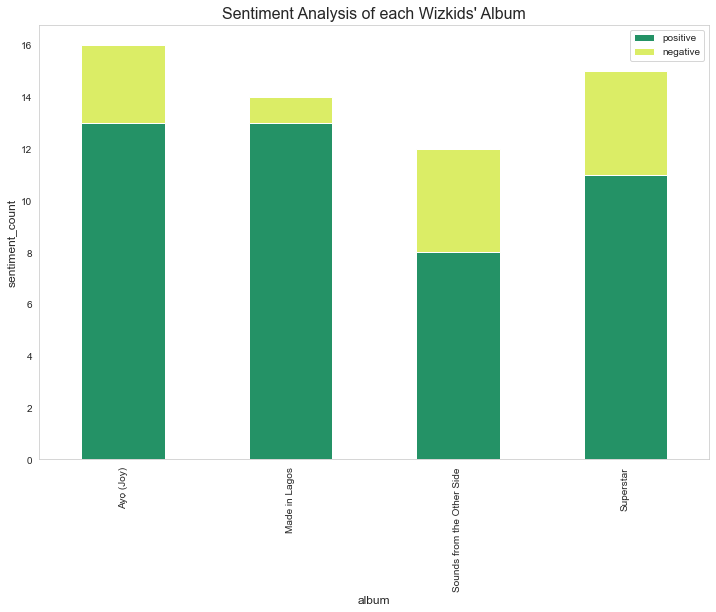

In [26]:
plot_sentiment(wiz_sentiment_data, 'Wizkid', 'summer')

In [27]:
#creating individual dataframes of albums
df_superstar = df_wizkid.loc[(df_wizkid.album == 'Superstar')]
df_made_in_lagos = df_wizkid.loc[(df_wizkid.album == 'Made in Lagos ')]
df_sound = df_wizkid.loc[(df_wizkid.album == 'Sounds from the Other Side')]
df_ayo = df_wizkid.loc[(df_wizkid.album == 'Ayọ (Joy)')]

In [28]:
#creating lists of words in each album and getting word counts and lexical diversity
Sounds_token = []
Sounds_lyrics = df_sound['lyrics']
Sounds_lyrics = Sounds_lyrics.apply(word_tokenize)
for i in Sounds_lyrics:
    for j in i:
        Sounds_token.append(j)
        

sounds_word_count = len(Sounds_token)
sounds_unique_word_count = len(set(Sounds_token))
sounds_lexical_diversity = sounds_unique_word_count / float(sounds_word_count)

superstar_token = []
superstar_lyrics = df_superstar['lyrics']
superstar_lyrics = superstar_lyrics.apply(word_tokenize)
for i in superstar_lyrics:
    for j in i:
        superstar_token.append(j)
        
superstar_word_count = len(superstar_token)
superstar_unique_word_count = len(set(superstar_token))
superstar_lexical_diversity = superstar_unique_word_count / float(superstar_word_count)


made_token = []
made_lyrics = df_made_in_lagos['lyrics']
made_lyrics = made_lyrics.apply(word_tokenize)
for i in made_lyrics:
    for j in i:
        made_token.append(j)
        
made_word_count = len(made_token)
made_unique_word_count = len(set(made_token))
made_lexical_diversity = made_unique_word_count / float(made_word_count)


ayo_token = []
ayo_lyrics = df_ayo['lyrics']
ayo_lyrics = ayo_lyrics.apply(word_tokenize)
for i in ayo_lyrics:
    for j in i:
        ayo_token.append(j)
        
ayo_word_count = len(ayo_token)
ayo_unique_word_count = len(set(ayo_token))
ayo_lexical_diversity = ayo_unique_word_count / float(ayo_word_count)


In [29]:
#creating new dataframe of albums and aggregated lyrics
wiz_stats = df_wizkid.groupby(['album']).agg({'lyrics': ' '.join}, inplace=True)
wiz_stats.reset_index(inplace=True)

In [30]:
#adding values and columns to dataframe
wiz_stats['word_count'] = [ayo_word_count, made_word_count, sounds_word_count, superstar_word_count]
wiz_stats['unique_word_count'] = [ayo_unique_word_count, made_unique_word_count, sounds_unique_word_count, 
                                  superstar_unique_word_count]
wiz_stats['lexical_diversity'] = [ayo_lexical_diversity, made_lexical_diversity, sounds_lexical_diversity, 
                                  superstar_lexical_diversity]
wiz_stats['year_released'] = [2014, 2020, 2017, 2011]
wiz_stats = wiz_stats.sort_values('year_released').reset_index().drop(columns=('index'))

In [31]:
#function to plot statistics
def plot_stats(df, artist_name):
    fig = plt.figure(figsize=(12,8))
    sns.lineplot(data = df, x = 'album', y = 'word_count', label='word_count', color = 'red')
    sns.lineplot(data = df, x = 'album', y = 'unique_word_count', label='unique_word_count', color='green')
    sns.lineplot(data = df, x = 'album', y = 'lexical_diversity', label = 'lexical_diversity', color='blue')
    plt.grid(b=None)
    plt.xlabel('albums', size=12)
    plt.ylabel('album_stats', size=12)
    plt.title("{}s' Album Lyrics Statistics".format(artist_name), size=16)
    plt.legend()
    plt.show()

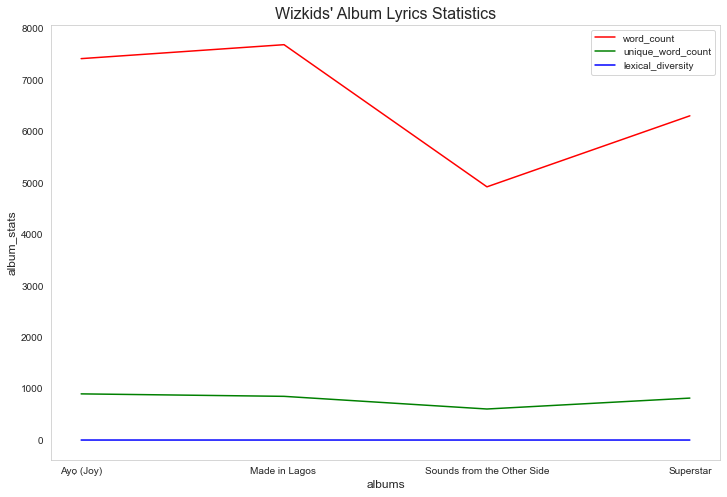

In [32]:
plot_stats(wiz_stats, 'Wizkid')

In [33]:
artist = []
title = []
album = []
year = []
lyrics = []

davido = genius.search_artist('Davido', per_page=50, sort='popularity', include_features=False)    
for song in davido.songs:
    artist.append(song.artist)
    title.append(song.title)
    album.append(song.album)
    year.append(song.year)
    lyrics.append(song.lyrics)

Searching for songs by Davido...

Song 1: "If"
Song 2: "Fall"
Song 3: "FIA"
Song 4: "Holy Ground"
Song 5: "FEM"
Song 6: "Risky"
Song 7: "Assurance"
Song 8: "The Best"
Song 9: "Jowo"
Song 10: "Coolest Kid in Africa"
Song 11: "Fans Mi"
Song 12: "Sweet in the Middle"
Song 13: "Pere"
Song 14: "So Crazy"
Song 15: "Flora My Flawa"
"Juice Back (Remix)" is not valid. Skipping.
Song 16: "D & G"
Song 17: "Like Dat"
"Odo (Remix)" is not valid. Skipping.
"If (Remix)" is not valid. Skipping.
Song 18: "Aye"
Song 19: "Disturbance"
Song 20: "Something Fishy"
Song 21: "Shopping Spree"
Song 22: "Dami Duro"
"Gangsta (Remix)" is not valid. Skipping.
Song 23: "How Long?"
Song 24: "Tanana"
Song 25: "La La"
Song 26: "I Got a Friend"
Song 27: "Fade"
Song 28: "Wonder Woman"
Song 29: "Intro"
Song 30: "Very Special"
"Know Your Worth (Remix)" is not valid. Skipping.
Song 31: "1 Milli"
Song 32: "Gbagbe Oshi"
Song 33: "Heaven"
"Woju (remix)" is not valid. Skipping.
"Tattoo Remix" is not valid. Skipping.
"Blessings 

In [34]:
df_davido = pd.DataFrame({'artist':artist, 'title':title, 'album':album, 'year':year, 'lyrics':lyrics})
df_davido.head()

,artist,title,album,year,lyrics
0,Davido,If,A Good Time,2017-02-17,[Intro]\nMy money my body na your own\n(It's O...
1,Davido,Fall,A Good Time,2017-06-02,[Intro]\nIyeh-eeh!\n\n[Chorus]\nMoney fall on ...
2,Davido,FIA,None,2017-11-10,"[Intro]\nFia ! Fia !\n[Post-Chorus]\nDab, make..."
3,Davido,Holy Ground,A Better Time,2020-11-13,‪[Intro: Davido & Nicki Minaj]\nMy holy ground...
4,Davido,FEM,A Better Time,2020-09-11,"[Intro]\nNapji killing this one\nPara\nPara, a..."


In [35]:
df_davido = clean(df_davido, 'lyrics')

In [36]:
df_davido.dropna(how='any', axis=0, subset=['album'], inplace=True)
df_davido = df_davido[df_davido.album !='The Baddest']
df_davido = df_davido[df_davido.title !='Skelewu']

In [37]:
df_davido.reset_index(inplace=True)
df_davido.drop(['index'], axis=1, inplace=True)

In [38]:
dav_lyrics = df_davido['lyrics']
dav_lyrics = dav_lyrics.apply(word_tokenize)

In [39]:
dfiltered_words = []
for i in dav_lyrics:
    for j in i:
        if j not in new_stopwords:
            dfiltered_words.append(j)

In [40]:
dav_top_words = Counter(dfiltered_words)

In [41]:
Dav_Top_words = pd.DataFrame.from_dict(dav_top_words, orient='index').reset_index()
Dav_Top_words = Dav_Top_words.rename(columns={'index':'Top words', 0:'Count'})
Dav_Top_words.sort_values('Count', inplace = True)
Dav_Top_words.reset_index(inplace=True)

In [42]:
Dav_Top_words.drop(['index'], axis=1, inplace=True)
Dav_Top_words.shape

(2247, 2)

In [43]:
Dav_Top_words.drop(Dav_Top_words.index[:2227], inplace=True)

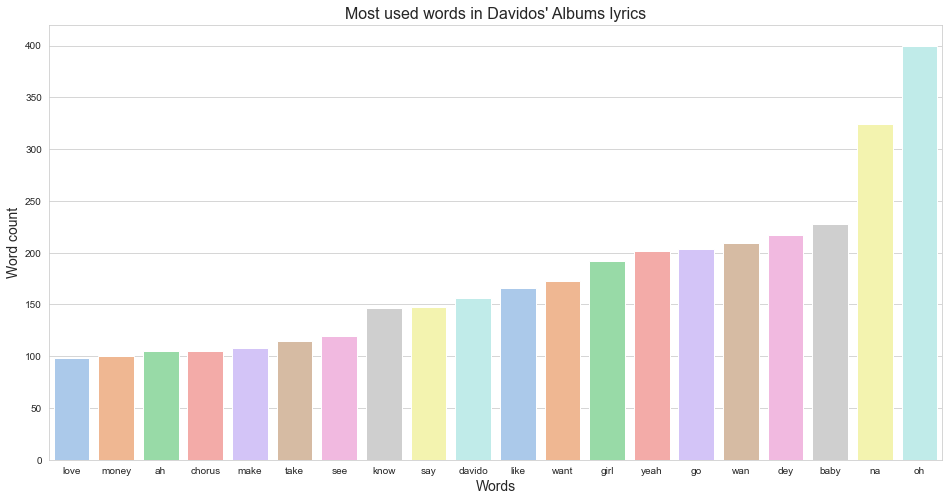

In [44]:
plot_words(Dav_Top_words, 'Davido', 'pastel')

In [45]:
df_davido['subjectivity'] = df_davido['lyrics'].apply(getSubjectivity)
df_davido['polarity'] = df_davido['lyrics'].apply(getPolarity)

df_davido.head()

,artist,title,album,year,lyrics,subjectivity,polarity
0,Davido,If,A Good Time,2017-02-17,my money my body na your own its obo baddest ...,0.548485,0.390909
1,Davido,Fall,A Good Time,2017-06-02,iyeheeh chorus money fall on you banana fall ...,0.627273,0.231818
2,Davido,Holy Ground,A Better Time,2020-11-13,davido nicki minaj my holy ground wey me i ru...,0.607639,-0.028472
3,Davido,FEM,A Better Time,2020-09-11,napji killing this one para para ahah 1 e be ...,0.462963,-0.021717
4,Davido,Risky,A Good Time,2019-10-23,popcaan risky risky yes yuh body risky risky w...,0.534133,0.106395


In [46]:
df_davido['sentiment'] = df_davido['polarity'].apply(get_text_analysis)
df_davido.head()

,artist,title,album,year,lyrics,subjectivity,polarity,sentiment
0,Davido,If,A Good Time,2017-02-17,my money my body na your own its obo baddest ...,0.548485,0.390909,Positive
1,Davido,Fall,A Good Time,2017-06-02,iyeheeh chorus money fall on you banana fall ...,0.627273,0.231818,Positive
2,Davido,Holy Ground,A Better Time,2020-11-13,davido nicki minaj my holy ground wey me i ru...,0.607639,-0.028472,Negative
3,Davido,FEM,A Better Time,2020-09-11,napji killing this one para para ahah 1 e be ...,0.462963,-0.021717,Negative
4,Davido,Risky,A Good Time,2019-10-23,popcaan risky risky yes yuh body risky risky w...,0.534133,0.106395,Positive


In [47]:
df_davido.groupby('album')['sentiment'].value_counts()

album                        sentiment
A Better Time                Positive     11
                             Negative      6
A Good Time                  Positive     10
                             Negative      4
                             Neutral       1
Omo Baba Olowo: The Genesis  Negative      8
                             Positive      8
Son Of Mercy EP              Positive      3
                             Negative      2
Name: sentiment, dtype: int64

In [48]:
dav_sentiment_data = pd.DataFrame({'album': ['A better time', 'A good time', 'OBO', 'Son of mercy EP'],
                              'positive': [11, 10, 8, 3], 'neutral': [0, 1, 0, 0] ,'negative': [6, 4, 8, 2]})
dav_sentiment_data = dav_sentiment_data.set_index('album')

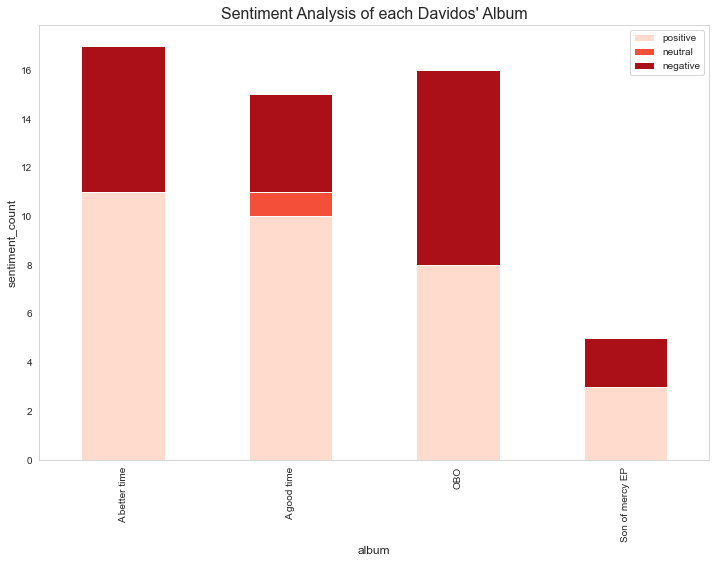

In [49]:
plot_sentiment(dav_sentiment_data, 'Davido', 'Reds')

In [50]:
df_better = df_davido.loc[(df_davido.album == 'A Better Time')]
df_good = df_davido.loc[(df_davido.album == 'A Good Time ')]
df_obo = df_davido.loc[(df_davido.album == 'Omo Baba Olowo: The Genesis')]
df_mercy = df_davido.loc[(df_davido.album == 'Son Of Mercy EP')]

In [51]:
better_token = []
better_lyrics = df_better['lyrics']
better_lyrics = better_lyrics.apply(word_tokenize)
for i in better_lyrics:
    for j in i:
        better_token.append(j)
        
better_word_count = len(better_token)
better_unique_word_count = len(set(better_token))
better_lexical_diversity = better_unique_word_count / float(better_word_count)


good_token = []
good_lyrics = df_good['lyrics']
good_lyrics = good_lyrics.apply(word_tokenize)
for i in good_lyrics:
    for j in i:
        good_token.append(j)
        
good_word_count = len(good_token)
good_unique_word_count = len(set(good_token))
good_lexical_diversity = good_unique_word_count / float(good_word_count)



obo_token = []
obo_lyrics = df_obo['lyrics']
obo_lyrics = obo_lyrics.apply(word_tokenize)
for i in obo_lyrics:
    for j in i:
        obo_token.append(j)
        
obo_word_count = len(obo_token)
obo_unique_word_count = len(set(obo_token))
obo_lexical_diversity = obo_unique_word_count / float(obo_word_count)


mercy_token = []
mercy_lyrics = df_mercy['lyrics']
mercy_lyrics = mercy_lyrics.apply(word_tokenize)
for i in mercy_lyrics:
    for j in i:
        mercy_token.append(j)
        
mercy_word_count = len(mercy_token)
mercy_unique_word_count = len(set(mercy_token))
mercy_lexical_diversity = mercy_unique_word_count / float(mercy_word_count)


In [52]:
dav_stats = df_davido.groupby(['album']).agg({'lyrics': ' '.join}, inplace=True)
dav_stats.reset_index(inplace=True)

In [53]:
dav_stats['word_count'] = [better_word_count, good_word_count, obo_word_count, mercy_word_count]
dav_stats['unique_word_count'] = [better_unique_word_count, good_unique_word_count, obo_unique_word_count, 
                                  mercy_unique_word_count]
dav_stats['lexical_diversity'] = [better_lexical_diversity, good_lexical_diversity, obo_lexical_diversity, 
                                  mercy_lexical_diversity]
dav_stats['year_released'] = [2020, 2019, 2012, 2016]
dav_stats = dav_stats.sort_values('year_released').reset_index().drop(columns=('index'))
dav_stats.drop(['lyrics'], axis=1, inplace=True)

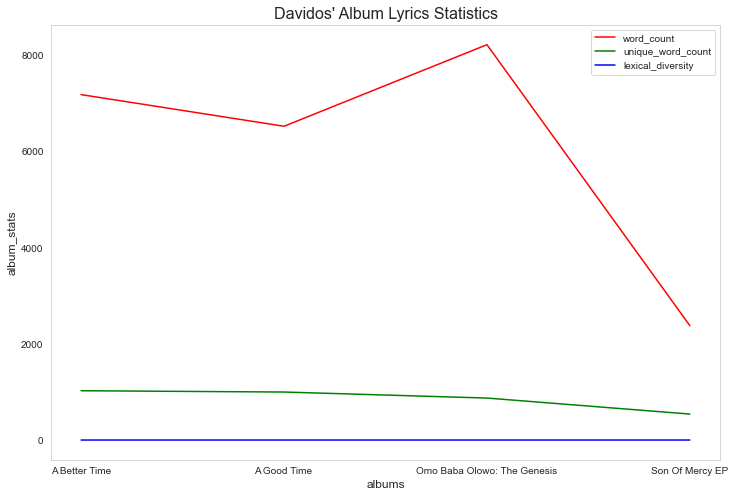

In [54]:
plot_stats(dav_stats, 'Davido')

In [55]:
artist = []
title = []
album = []
year = []
lyrics = []

burnaboy = genius.search_artist('Burna boy', per_page=50, sort='popularity', include_features=False)    
for song in burnaboy.songs:
    artist.append(song.artist)
    title.append(song.title)
    album.append(song.album)
    year.append(song.year)
    lyrics.append(song.lyrics)   

Searching for songs by Burna boy...

Changing artist name to 'Burna Boy'
Song 1: "Ye"
Song 2: "On the Low"
Song 3: "JA ARA E"
Song 4: "23"
Song 5: "Anybody"
Song 6: "Real Life"
Song 7: "Monsters You Made"
Song 8: "Gbona"
Song 9: "Gum Body"
Song 10: "Way Too Big"
Song 11: "Bank on It"
Song 12: "Level Up (Twice as Tall)"
Song 13: "Pree Me"
"Jerusalema Remix" is not valid. Skipping.
Song 14: "Dangote"
Song 15: "Wonderful"
Song 16: "No Fit Vex"
Song 17: "Collateral Damage"
Song 18: "Time Flies"
"Enjoy Yourself (Remix)" is not valid. Skipping.
Song 19: "Wettin Dey Sup"
Song 20: "Pull Up"
Song 21: "African Giant"
Song 22: "Secret"
Song 23: "Wetin Man Go Do"
Song 24: "Heaven’s Gate"
Song 25: "Sekkle Down"
Song 26: "Onyeka (Baby)"
Song 27: "Omo"
Song 28: "Bebo"
Song 29: "Alarm Clock"
Song 30: "Another Story"
Song 31: "Like To Party"
Song 32: "Different"
Song 33: "Naughty by Nature"
Song 34: "Deja Vu"
Song 35: "Soke"
Song 36: "Comma"
Song 37: "Rock Your Body"
Song 38: "Spiritual"
Song 39: "Calm

In [56]:
df_burna = pd.DataFrame({'artist':artist, 'title':title, 'album':album, 'year':year, 'lyrics':lyrics})
df_burna.head()

,artist,title,album,year,lyrics
0,Burna Boy,Ye,Outside,2018-01-26,"[Intro]\nYeah\nMy nigga... die for nothing, ah..."
1,Burna Boy,On the Low,African Giant,2018-11-16,"[Intro]\nIt's Kel P vibes\nYeah, yeah\nKpokpot..."
2,Burna Boy,JA ARA E,The Lion King: The Gift,2019-07-19,"[Intro]\n(Ehe) Ko juba, ko juba\n(Ehe) Ko juba..."
3,Burna Boy,23,Twice as Tall,2020-08-13,[Intro]\nThe music make me feel I be Jordan\nN...
4,Burna Boy,Anybody,African Giant,2019-06-14,"[Intro]\nEheeenn, Ehennnn\nGbese\nEhennn, Ehen..."


In [57]:
df_burna= clean(df_burna, 'lyrics')

In [58]:
df_burna.loc[74, 'album'] = 'African Giant'

In [59]:
df_burna.drop(df_burna.index[[2, 41, 60, 67]], inplace=True)

In [60]:
df_burna.dropna(how='any', axis=0, subset=['album'], inplace=True)

In [61]:
df_burna = df_burna[df_burna.album !='On a Spaceship']

In [62]:
df_burna.reset_index(inplace=True)
df_burna.drop(['index'], axis=1, inplace=True)

In [63]:
bur_lyrics = df_burna['lyrics']
bur_lyrics = bur_lyrics.apply(word_tokenize)

In [64]:
bfiltered_words = []
for i in bur_lyrics:
    for j in i:
        if j not in new_stopwords:
            bfiltered_words.append(j)

In [65]:
bur_top_words = Counter(bfiltered_words)

In [66]:
Bur_Top_words = pd.DataFrame.from_dict(bur_top_words, orient='index').reset_index()
Bur_Top_words = Bur_Top_words.rename(columns={'index':'Top words', 0:'Count'})
Bur_Top_words.sort_values('Count', inplace = True)
Bur_Top_words.reset_index(inplace=True)

In [67]:
Bur_Top_words.drop(['index'], axis=1, inplace=True)

In [68]:
Bur_Top_words.shape

(2858, 2)

In [69]:
Bur_Top_words.drop(Bur_Top_words.index[:2838], inplace=True)

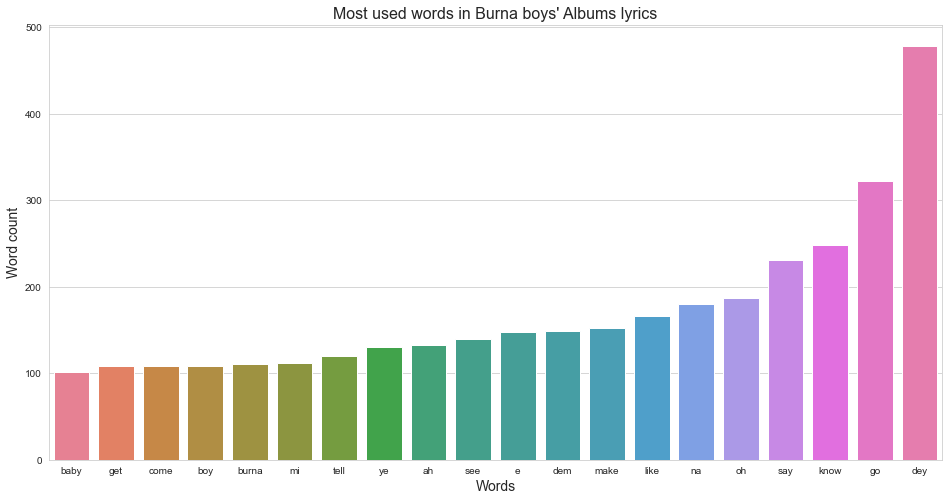

In [70]:
plot_words(Bur_Top_words, 'Burna boy', 'husl')

In [71]:
df_burna['subjectivity'] = df_burna['lyrics'].apply(getSubjectivity)
df_burna['polarity'] = df_burna['lyrics'].apply(getPolarity)

df_burna.head()

,artist,title,album,year,lyrics,subjectivity,polarity
0,Burna Boy,Ye,Outside,2018-01-26,yeah my nigga die for nothing ah my nigga die ...,0.480808,0.027273
1,Burna Boy,On the Low,African Giant,2018-11-16,its kel p vibes yeah yeah kpokpotikpo kpo kpo ...,0.440250,0.153500
2,Burna Boy,23,Twice as Tall,2020-08-13,the music make me feel i be jordan now i under...,0.654545,0.140909
3,Burna Boy,Anybody,African Giant,2019-06-14,eheeenn ehennnn gbese ehennn ehennn 1 i don c...,0.428571,0.232857
4,Burna Boy,Real Life,Twice as Tall,2020-08-13,diddy it aint like you hearing it and its like...,0.450087,0.159566


In [72]:
df_burna['sentiment'] = df_burna['polarity'].apply(get_text_analysis)
df_burna.head()

,artist,title,album,year,lyrics,subjectivity,polarity,sentiment
0,Burna Boy,Ye,Outside,2018-01-26,yeah my nigga die for nothing ah my nigga die ...,0.480808,0.027273,Positive
1,Burna Boy,On the Low,African Giant,2018-11-16,its kel p vibes yeah yeah kpokpotikpo kpo kpo ...,0.440250,0.153500,Positive
2,Burna Boy,23,Twice as Tall,2020-08-13,the music make me feel i be jordan now i under...,0.654545,0.140909,Positive
3,Burna Boy,Anybody,African Giant,2019-06-14,eheeenn ehennnn gbese ehennn ehennn 1 i don c...,0.428571,0.232857,Positive
4,Burna Boy,Real Life,Twice as Tall,2020-08-13,diddy it aint like you hearing it and its like...,0.450087,0.159566,Positive


In [73]:
df_burna.groupby('album')['sentiment'].value_counts()

album          sentiment
African Giant  Positive     13
               Negative      5
L.I.F.E        Positive     11
               Negative      1
Outside        Positive     10
               Negative      4
Redemption     Positive      4
               Negative      1
Twice as Tall  Positive     11
               Negative      4
Name: sentiment, dtype: int64

In [74]:
bur_sentiment_data = pd.DataFrame({'album': ['African Giant', 'L.I.F.E', 'Outside', 'Redemption', 'Twice as Tall'],
                              'positive': [13, 11, 10, 4, 11], 'negative': [5, 1, 4, 1, 4]})
bur_sentiment_data = bur_sentiment_data.set_index('album')

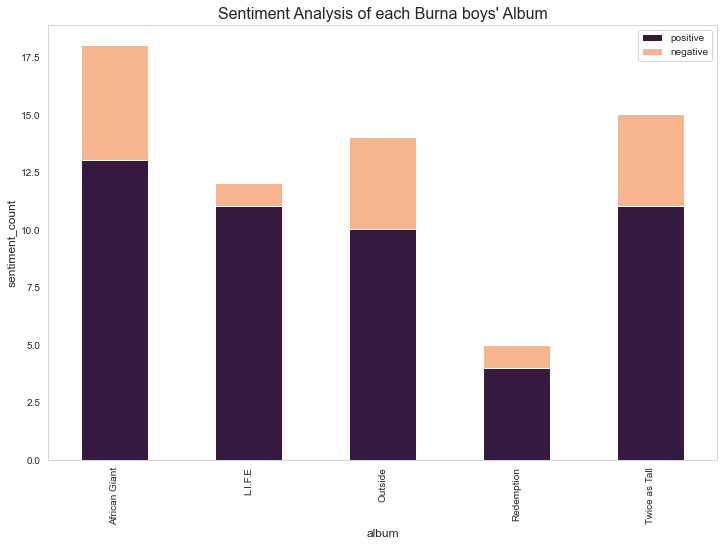

In [75]:
plot_sentiment(bur_sentiment_data, 'Burna boy', 'rocket')

In [76]:
df_outside = df_burna.loc[(df_burna.album == 'Outside')]
df_african = df_burna.loc[(df_burna.album == 'African Giant')]
df_twice = df_burna.loc[(df_burna.album == 'Twice as Tall')]
df_redemption = df_burna.loc[(df_burna.album == 'Redemption')]
df_life = df_burna.loc[(df_burna.album == 'L.I.F.E')]

In [77]:
outside_token = []
outside_lyrics = df_outside['lyrics']
outside_lyrics = outside_lyrics.apply(word_tokenize)
for i in outside_lyrics:
    for j in i:
        outside_token.append(j)
        
outside_word_count = len(outside_token)
outside_unique_word_count = len(set(outside_token))
outside_lexical_diversity = outside_unique_word_count / float(outside_word_count)


african_token = []
african_lyrics = df_african['lyrics']
african_lyrics = african_lyrics.apply(word_tokenize)
for i in african_lyrics:
    for j in i:
        african_token.append(j)
        
african_word_count = len(african_token)
african_unique_word_count = len(set(african_token))
african_lexical_diversity = african_unique_word_count / float(african_word_count)



twice_token = []
twice_lyrics = df_twice['lyrics']
twice_lyrics = twice_lyrics.apply(word_tokenize)
for i in twice_lyrics:
    for j in i:
        twice_token.append(j)
        
twice_word_count = len(twice_token)
twice_unique_word_count = len(set(twice_token))
twice_lexical_diversity = twice_unique_word_count / float(twice_word_count)


redemption_token = []
redemption_lyrics = df_redemption['lyrics']
redemption_lyrics = redemption_lyrics.apply(word_tokenize)
for i in redemption_lyrics:
    for j in i:
        redemption_token.append(j)
        
redemption_word_count = len(redemption_token)
redemption_unique_word_count = len(set(redemption_token))
redemption_lexical_diversity = redemption_unique_word_count / float(redemption_word_count)


life_token = []
life_lyrics = df_life['lyrics']
life_lyrics = life_lyrics.apply(word_tokenize)
for i in life_lyrics:
    for j in i:
        life_token.append(j)
        
life_word_count = len(life_token)
life_unique_word_count = len(set(life_token))
life_lexical_diversity = life_unique_word_count / float(life_word_count)


In [79]:
burna_stats = df_burna.groupby(['album']).agg({'lyrics': ' '.join}, inplace=True)
burna_stats.reset_index(inplace=True)

In [80]:
burna_stats['word_count'] = [outside_word_count, african_word_count, twice_word_count, redemption_word_count, life_word_count]
burna_stats['unique_word_count'] = [outside_unique_word_count, african_unique_word_count, twice_unique_word_count, 
                                  redemption_unique_word_count, life_unique_word_count]
burna_stats['lexical_diversity'] = [outside_lexical_diversity, african_lexical_diversity, twice_lexical_diversity, 
                                  redemption_lexical_diversity, life_lexical_diversity]
burna_stats['year_released'] = [2018, 2019, 2020, 2016, 2013]
burna_stats = burna_stats.sort_values('year_released').reset_index().drop(columns=('index'))
burna_stats.drop(['lyrics'], axis=1, inplace=True)

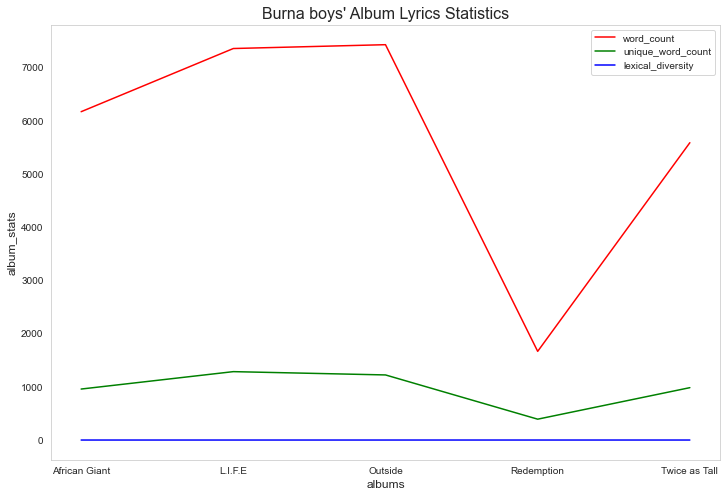

In [81]:
plot_stats(burna_stats, 'Burna boy')

In [82]:
def lyrical_stats(list1):
    word_count = len(list1)
    unique_word_count = len(set(list1))
    lexical_diversity = unique_word_count / float(word_count)
    return  word_count, unique_word_count, lexical_diversity 

In [83]:
lyrical_stats(wfiltered_words)

(16824, 1913, 0.11370660960532572)

In [84]:
lyrical_stats(dfiltered_words)

(14537, 2247, 0.15457109444864828)

In [85]:
lyrical_stats(bfiltered_words)

(17299, 2858, 0.16521186195733858)

In [86]:
df_stats = pd.DataFrame({'Artist': ['Wizkid', 'Davido', 'Burnaboy'], 'Word_count' : [16824, 14537, 17299], 
                         'Unique_word_count': [1913, 2247, 2856], 
                    'Lexical_diversity' : [0.11370660, 0.15471094, 0.16509624]})
df_stats

,Artist,Word_count,Unique_word_count,Lexical_diversity
0,Wizkid,16824,1913,0.113707
1,Davido,14537,2247,0.154711
2,Burnaboy,17299,2856,0.165096


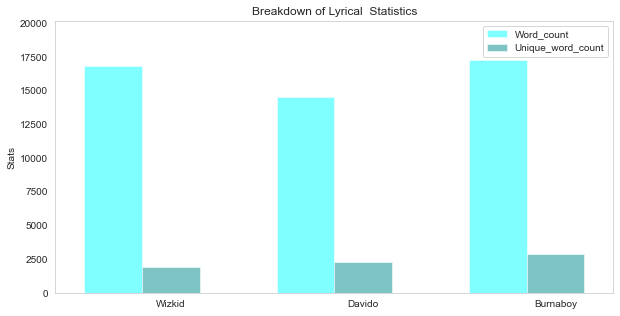

In [87]:
pos = list(range(len(df_stats['Word_count'])))
width = 0.30
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, df_stats['Word_count'], width, alpha=0.5, color='aqua', label='Word_count')
plt.bar([p + width for p in pos], df_stats['Unique_word_count'], width, alpha=0.5, color= 'darkcyan', label='Unique_word_count')
ax.set_xticks([p + 1.0 * width for p in pos])
ax.set_xticklabels(df_stats['Artist'])
ax.set_ylabel('Stats')
ax.set_title('Breakdown of Lyrical  Statistics')
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, max(df_stats['Word_count'] + df_stats['Unique_word_count'])])
plt.grid(b=None)
plt.legend()
plt.show()

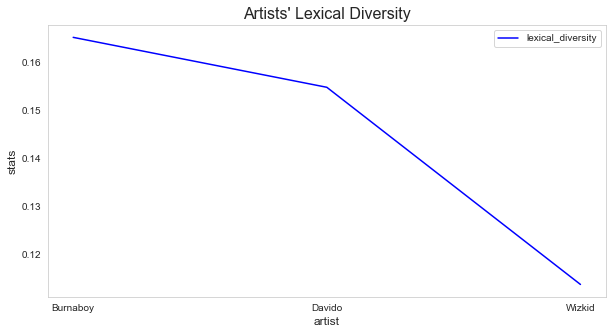

In [88]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data = df_stats, x = 'Artist', y = 'Lexical_diversity', label = 'lexical_diversity', color='blue')
plt.grid(b=None)
plt.xlabel('artist', size=12)
plt.ylabel('stats', size=12)
plt.title("Artists' Lexical Diversity", size=16)
plt.show()